# # Generate Figure 4
Population activity in neuronal pattern space, shows that different neuronal assemblies are active for each population activity trajectories. A. Smoothed single neuron activity for 0.5 sec of stimulus (green area) and 0.5 sec of delay epoch. B. Same population activity as in A, but now reduced with NNMF to 3 components (assembly space). The dynamic and highly irregular single neuron activity, appears smooth in the assembly space. Also the change from the stimulus to delay epoch is evident. C. Activity of 7 trials with delay epoch response (out of 10), colored as three k-means identified states, presented each time with respect to an assembly activity. It is evident that stable population states that cluster in state space (similar colors), appear to correspond to activity of a specific assembly. D. Same data as C, now plotted in assembly space.

Import necessary modules:

In [1]:
import notebook_module as nb
import analysis_tools as analysis
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import partial
from pathlib import Path
from pynwb import NWBHDF5IO
from itertools import chain
import matplotlib.gridspec as gridspec
from matplotlib import cm

## Create figure 4

determine_number_of_clusters reseeds the RNG.
pcaL2 reseeds the RNG.
L found to be: 3
Cannot run kmeans with greater k than the data_pcapoints!
@k:4 k_means Overfit!!!


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


[NMF] Running: 
[NMF] Completed: 
Cross-validated!
[NMF] Running: 
[NMF] Completed: 
Cross-validated!
39
39
39


c:\users\steve\anaconda3\envs\publication\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


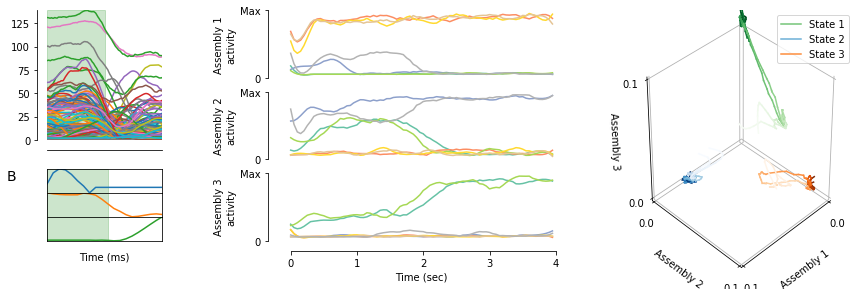

In [2]:
simulations_dir = Path.cwd().joinpath('simulations')
glia_dir = Path(r'G:\Glia')
plt.rcParams.update({'font.family': 'Helvetica'})
plt.rcParams["figure.figsize"] = (15, 15)

y_array = np.linspace(0.1, 100, 1000)
y_nnmf_array = np.linspace(0.1, 1, 2000)
y_i = 500
no_of_conditions = 10
no_of_animals = 4

simulations_dir = Path.cwd().joinpath('simulations')
plt.rcParams.update({'font.family': 'Helvetica'})
#===============================================================================
#===============================================================================
# Beginning of Figure 4
#===============================================================================
#===============================================================================
plt.ion()

# I must discover the optimal number of NNMF components:
#fig, axblah = plt.subplots(1,1)
#plt.cla()
#plt.ion()
#K_star_nnmf = np.zeros((no_of_animals, no_of_conditions, len(y_nnmf_array)), dtype=int)

subplot_width = 4
subplot_height = 1
figure4 = plt.figure(figsize=plt.figaspect(subplot_height / subplot_width))

gs1 = gridspec.GridSpec(1, 1, left=0.05, right=0.15, top=0.95, bottom=0.50, wspace=0.35, hspace=0.0)
A_axis_a = plt.subplot(gs1[:, 0])
nb.mark_figure_letter(A_axis_a, 'A')

gs1b = gridspec.GridSpec(3, 1, left=0.05, right=0.15, top=0.40, bottom=0.15, wspace=0.35, hspace=0.0)
B_axis_a = plt.subplot(gs1b[0, 0])
B_axis_b = plt.subplot(gs1b[1, 0])
B_axis_c = plt.subplot(gs1b[2, 0])
nb.mark_figure_letter(B_axis_a, 'B')

gs2 = gridspec.GridSpec(3, 1, left=0.25, right=0.50, top=0.95, bottom=0.15, wspace=0.35, hspace=0.2)
C_axis_a = plt.subplot(gs2[0, 0])
C_axis_b = plt.subplot(gs2[1, 0])
C_axis_c = plt.subplot(gs2[2, 0])
nb.mark_figure_letter(C_axis_a, 'C')

# Plot same animal model, different learning conditions:
NWBfile = analysis.load_nwb_file(
    animal_model=3,
    learning_condition=3,
    experiment_config='structured',
    type='bn',
    data_path=simulations_dir
)

trial_len = analysis.get_acquisition_parameters(
    input_NWBfile=NWBfile,
    requested_parameters=['trial_len']
)
custom_range = (20, int(trial_len / 50))

K_star, K_labels, *_ = analysis.determine_number_of_clusters(
    NWBfile_array=[NWBfile],
    max_clusters=10,
    y_array=y_array,
    custom_range=custom_range
)

# Dynamic network response:
trial_inst_ff = analysis.trial_instantaneous_frequencies(
    NWBfile=NWBfile, trialid=1, smooth=True
)
ff_threshold = 5  # Hz
A_axis_a.cla()
for cellid, inst_ff in trial_inst_ff:
    #if inst_ff.mean() > ff_threshold:
    A_axis_a.plot(inst_ff[550:1550])
A_axis_a.margins(0.0)
A_axis_a.axvspan(0.0, 500.0, ymin=0, ymax=1, color='g', alpha=0.2)
nb.adjust_spines(A_axis_a, ['left', 'bottom'])
A_axis_a.xaxis.set_ticks_position('none')
A_axis_a.xaxis.set_ticklabels([])

# First decomposition: stimulus to delay transition:
W_stim2delay, *_ = analysis.NNMF(
    NWBfile_array=[NWBfile],
    n_components=3,
    custom_range=(10, 30),
    smooth=True,
    plot=False
)

B_axis_a.plot(W_stim2delay[0,0,:].T, 'C0')
B_axis_b.plot(W_stim2delay[1,0,:].T, 'C1')
B_axis_c.plot(W_stim2delay[2,0,:].T, 'C2')
B_axis_a.margins(0.0)
B_axis_a.axvspan(0.0, 10.0, ymin=0, ymax=1, color='g', alpha=0.2)
B_axis_a.xaxis.set_ticks_position('none')
B_axis_a.xaxis.set_ticklabels([])
B_axis_a.yaxis.set_ticks_position('none')
B_axis_a.yaxis.set_ticklabels([])
B_axis_b.margins(0.0)
B_axis_b.axvspan(0.0, 10.0, ymin=0, ymax=1, color='g', alpha=0.2)
B_axis_b.xaxis.set_ticks_position('none')
B_axis_b.xaxis.set_ticklabels([])
B_axis_b.yaxis.set_ticks_position('none')
B_axis_b.yaxis.set_ticklabels([])
B_axis_c.margins(0.0)
B_axis_c.axvspan(0.0, 10.0, ymin=0, ymax=1, color='g', alpha=0.2)
B_axis_c.xaxis.set_ticks_position('none')
B_axis_c.xaxis.set_ticklabels([])
B_axis_c.yaxis.set_ticks_position('none')
B_axis_c.yaxis.set_ticklabels([])
B_axis_c.set_xlabel('Time (ms)')



W_components, *_ = analysis.NNMF(
    NWBfile_array=[NWBfile],
    n_components=3,
    custom_range=custom_range,
    smooth=True,
    plot=False
)

E_ax = [C_axis_a, C_axis_b, C_axis_c]
klabels = K_labels[y_i]
# Color differently each trial:
trial_colors = cm.Set2(np.linspace(0, 1, W_components.shape[1]))
for assembly, assembly_axis in zip(range(1, 4), E_ax):
    assembly_axis.cla()
    for trialid in range(0, W_components.shape[1]):
        #if klabels[trialid] == assembly:
        # W components are normalized, but with the smoothing they exceed
        # and they dont look good. So norm them again.
        assembly_component = W_components[assembly - 1,trialid,:].T
        assembly_axis.plot(assembly_component, color=trial_colors[trialid, :])
    assembly_axis.set_ylabel(f'Assembly {assembly}\nactivity')
    assembly_axis.spines['top'].set_visible(False)
    assembly_axis.spines['top'].set_color(None)
    assembly_axis.spines['right'].set_visible(False)
    assembly_axis.spines['right'].set_color(None)
    assembly_axis.spines['left'].set_position('zero')
    ylim = assembly_axis.get_ylim()
    assembly_axis.set_yticks(ylim)
    assembly_axis.set_yticklabels(['0', 'Max'])
    nb.adjust_spines(assembly_axis, ['left'])
    #assembly_axis.set_ylim([0.0, 1.1])
    if assembly != 3:
        assembly_axis.spines['bottom'].set_visible(False)
        assembly_axis.spines['bottom'].set_color(None)
        assembly_axis.tick_params(axis=False)
        assembly_axis.xaxis.set_ticks_position('none')
        assembly_axis.xaxis.set_ticklabels([])
        assembly_axis.spines['bottom'].set_position('zero')

C_axis_c.xaxis.set_ticks(range(0, 100, 20))
C_axis_c.xaxis.set_ticklabels(range(0, 5))
C_axis_c.set_xlabel('Time (sec)')
C_axis_c.spines['bottom'].set_visible(True)
C_axis_c.spines['bottom'].set_color('k')
nb.adjust_spines(C_axis_c, ['left', 'bottom'])


#D_axis_b.set_xlim([0.0, 5000])
#D_axis_b.set_ylim([0.0, 160])
#D_axis_b.spines['left'].set_position('zero')
#D_axis_b.spines['bottom'].set_position('zero')
#D_axis_b.axvspan(50.0, 1050.0, ymin=0, ymax=1, color='g', alpha=0.2)

gs3 = gridspec.GridSpec(1, 1, left=0.55, right=0.75, top=0.95, bottom=0.02, wspace=0.35, hspace=0.2)
D_axis_a = plt.subplot(gs3[0, 0], projection='3d')
#nb.mark_figure_letter(D_axis_a, 'D')

# A 3d plot with the last 1s of the above, in assemblie space.
plot_axes = D_axis_a
plot_axes.cla()
# Stylize the 3d plot:
plot_axes.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plot_axes.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plot_axes.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plot_axes.set_xlabel('Assembly 1')
plot_axes.set_ylabel('Assembly 2')
plot_axes.set_zlabel('Assembly 3')
#TODO: Someway the W_components are smaller (NNMF seems the culprit). Investigate
pca_axis_limits = (0, 0.1)
plot_axes.set_xlim(pca_axis_limits)
plot_axes.set_ylim(pca_axis_limits)
plot_axes.set_zlim(pca_axis_limits)
plot_axes.set_xticks(pca_axis_limits)
plot_axes.set_yticks(pca_axis_limits)
plot_axes.set_zticks(pca_axis_limits)
#azim, elev = plot_axes.azim, plot_axes.elev
plot_axes.elev = 35#22.5
plot_axes.azim = 45#52.4

labels = klabels.tolist()
nclusters = np.unique(klabels).size
#colors = cm.Set2(np.linspace(0, 1, nclusters))
_, key_labels = np.unique(labels, return_index=True)
handles = []
total_trials = W_components.shape[1]
duration = W_components.shape[2]
colors = {1: cm.Greens(np.linspace(0, 1, duration - 1)),
          2: cm.Blues(np.linspace(0, 1, duration - 1)),
          3: cm.Oranges(np.linspace(0, 1, duration - 1)),
          }
for i, (trial, label) in enumerate(zip(range(total_trials), labels)):
    capture_artist = True
    for t, c in zip(reversed(range(duration - 1)), reversed(colors[label])):
        x = W_components[0][trial][t:t + 2]
        y = W_components[1][trial][t:t + 2]
        z = W_components[2][trial][t:t + 2]
        handle = plot_axes.plot(x, y, z,
                                color=c,
                                label=f'State {label}'
                                )
        if t < duration / 2:
            if i in key_labels and capture_artist:
                print(t)
                handles.append(handle[0])
                capture_artist = False
# Youmust group handles based on unique labels.
plot_axes.legend(handles=handles, labels=['State 1', 'State 2', 'State 3'])

#TODO: na pros8eseis ena graph. h timh sto text pou na leei to cosine dist
# aftwn twn vectors.

figure4.savefig('Figure_4.png')
figure4.savefig('Figure_4.svg')

blah = []
for animal_model in range(4):
    for learning_condition in range(10):
        blah.append(K_star_nnmf[animal_model,learning_condition,90])


fig = plt.figure()
plt.cla()
y = 20
for animal_model in range(4):
    for learning_condition in range(10):
        plt.plot(K_star_nnmf[animal_model,learning_condition,40:60])
plt.title(f'y={y}')
plt.show()

W_components, *_ = analysis.NNMF(
    NWBfile_array=[NWBfile],
    n_components=3,
    custom_range=custom_range,
    smooth=True,
    plot=False
)


Plot the annotated clustering results:
analysis.pcaL2(
    NWBfile_array=[NWBfile],
    klabels=K_labels[y_i, :].T,
    custom_range=custom_range,
    smooth=True, plot_3d=True,
    plot_axes=figure4_axis[0, 0]
)

==============================================================================
End of Figure 4
==============================================================================
==============================================================================
==============================================================================

In [ ]:
#figure4.savefig('Figure_4.png')
#figure4.savefig('Figure_4.svg')
print('Tutto pronto!')


#%%